In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import warnings 

warnings.filterwarnings('ignore')

In [4]:
dataset = pd.read_csv("newWorld.csv")

In [3]:
dataset

,Country,Region,Population,Area,Pop. Density,GDP,Literacy,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,700,36.0,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,4500,86.5,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,6000,70.0,0.101,0.600,0.298
3,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,1900,42.0,0.096,0.658,0.246
4,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,8600,95.0,0.040,0.180,0.780
...,...,...,...,...,...,...,...,...,...,...
193,Vietnam,ASIA (EX. NEAR EAST),84402966,329560,256.1,2500,90.3,0.209,0.410,0.381
194,Yemen,NEAR EAST,21456188,527970,40.6,800,50.2,0.135,0.472,0.393
195,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,800,80.6,0.220,0.290,0.489
196,Zimbabwe,SUB-SAHARAN AFRICA,12236805,390580,31.3,1900,90.7,0.179,0.243,0.579


In [158]:
dataset.describe()

,Population,Area,Pop. Density,GDP,Literacy,Agriculture,Industry,Service
count,1.970000e+02,1.970000e+02,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,3.300274e+07,6.761230e+05,250.513198,9323.857868,82.191371,0.154056,0.287589,0.557853
std,1.260442e+08,1.904300e+06,1240.815347,10075.064660,19.867795,0.148698,0.139411,0.164979
min,1.347700e+04,2.800000e+01,1.800000,500.000000,17.600000,0.001000,0.032000,0.062000
25%,1.136334e+06,1.906000e+04,26.900000,1800.000000,70.000000,0.038000,0.198000,0.426000
50%,6.822378e+06,1.126200e+05,70.800000,5100.000000,91.000000,0.100000,0.273000,0.563000
75%,2.230355e+07,5.047820e+05,156.000000,13100.000000,97.900000,0.227000,0.350000,0.676000
max,1.313974e+09,1.707520e+07,16183.000000,55100.000000,100.000000,0.769000,0.906000,0.954000


In [ ]:
# For columns 'Area','Pop. Density', 'GDP' the values of median (50%) and mean are very far from each other meaning
# the distribution is not skewed. The median values are higher than the mean indicating left skewness

# For the columns 'Literacy', 'Agriculture', 'Industry', 'Service' the median is close to the median indicating the
# distribution is normal

# For 'Area', 'Population', 'Pop. Density', 'GDP' the values of std are very high indicating that the data is spread across
# from the mean which is also evident from the difference in the min and max value for the same columns.

# Conversely the std for 'Agriculture', 'Industry', 'Service' is quite low suggesting the data is close to mean value,
# a same inference can be made by observing the max and min values for these columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E698304E48>,
      dtype=object)

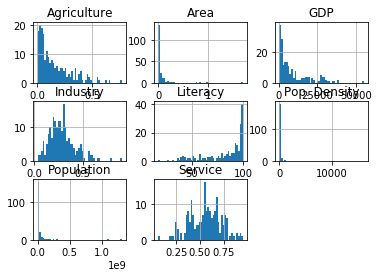

In [185]:
dataset.hist(bins=50)

In [ ]:
# Histogram plot for all features, to get a visual of the distribution of data, higher the bins value, clearer the distribution
# is visualised

# From the plots it is clear that the distribution for Service column is very close to a normal distribution and others are 
# skewed either to te left or right

In [174]:
dataset.isnull().sum()

Country         0
Region          0
Population      0
Area            0
Pop. Density    0
GDP             0
Literacy        0
Agriculture     0
Industry        0
Service         0
dtype: int64

In [ ]:
# No null or missing values

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       198 non-null    object 
 1   Region        198 non-null    object 
 2   Population    198 non-null    int64  
 3   Area          198 non-null    int64  
 4   Pop. Density  198 non-null    float64
 5   GDP           198 non-null    int64  
 6   Literacy      198 non-null    float64
 7   Agriculture   198 non-null    float64
 8   Industry      198 non-null    float64
 9   Service       198 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 15.6+ KB


#### Pandas duplicated() method helps in analyzing duplicate values only. It returns a boolean series.

In [ ]:
# Checking the data for duplicates

In [7]:
if len(dataset[dataset.duplicated()]) > 0:
    print("Total number of duplicated entries found is : ", len(dataset[dataset.duplicated()]))
    
    print(dataset[dataset.duplicated(keep=False)].sort_values(by=list(dataset.columns)))
else:
    print("No duplicate entries found here! Go ahead :D ")

Total number of duplicated entries found is :  1
       Country                               Region  Population    Area  \
196  Zimbabwe   SUB-SAHARAN AFRICA                     12236805  390580   
197  Zimbabwe   SUB-SAHARAN AFRICA                     12236805  390580   

     Pop. Density   GDP  Literacy  Agriculture  Industry  Service  
196          31.3  1900      90.7        0.179     0.243    0.579  
197          31.3  1900      90.7        0.179     0.243    0.579  


In [8]:
dataset.drop_duplicates(inplace=True)

In [9]:
if len(dataset[dataset.duplicated()]) > 0:
    print("Total number of duplicated entries found is : ", len(dataset[dataset.duplicated()]))
    
    print(dataset[dataset.duplicated(keep=False)].sort_values(by=list(dataset.columns)))
else:
    print("No duplicate entries found here! Go ahead :D ")

No duplicate entries found here! Go ahead :D 


In [10]:
dataRegionWise=dataset['Region'].value_counts(normalize=False,dropna=False)
dataRegionWise

SUB-SAHARAN AFRICA                     49
LATIN AMER. & CARIB                    42
ASIA (EX. NEAR EAST)                   27
WESTERN EUROPE                         20
NEAR EAST                              14
OCEANIA                                13
C.W. OF IND. STATES                    12
EASTERN EUROPE                          9
NORTHERN AFRICA                         5
NORTHERN AMERICA                        3
BALTICS                                 3
Name: Region, dtype: int64

In [ ]:
# A high level overview of distribution of data with respect to regions 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

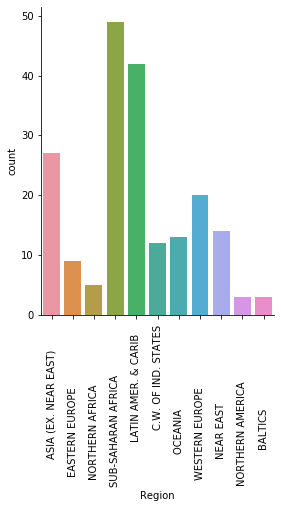

In [12]:
sns.catplot(x="Region", kind="count", data=dataset);
plt.xticks(rotation=90)

In [ ]:
# Visualization of data segregated from point of regions

# As per the plot, maximum records belong to the Sub-Saharan Africa region, very few records belonging to the North American
# & Baltics region

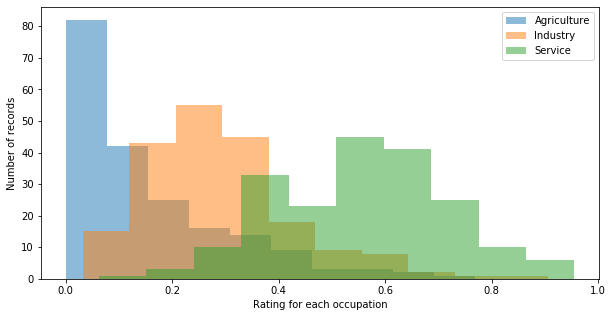

In [195]:
plt.figure(figsize=(10,5))
plt.hist(dataset['Agriculture'], alpha=0.5, label='Agriculture')
plt.hist(dataset['Industry'], alpha=0.5, label='Industry')
plt.hist(dataset['Service'], alpha=0.5, label='Service')
plt.legend(loc='upper right')
plt.xlabel('Rating for each occupation')
plt.ylabel('Number of records')
plt.show()

In [196]:
# Distribution of the various occupations supporting the GDP
# A lot of records for Agriculture but with low rating of around 0.0 to 0.1
# A few records for Service & Industry but with high rating ranging between 0.2 to 1.0

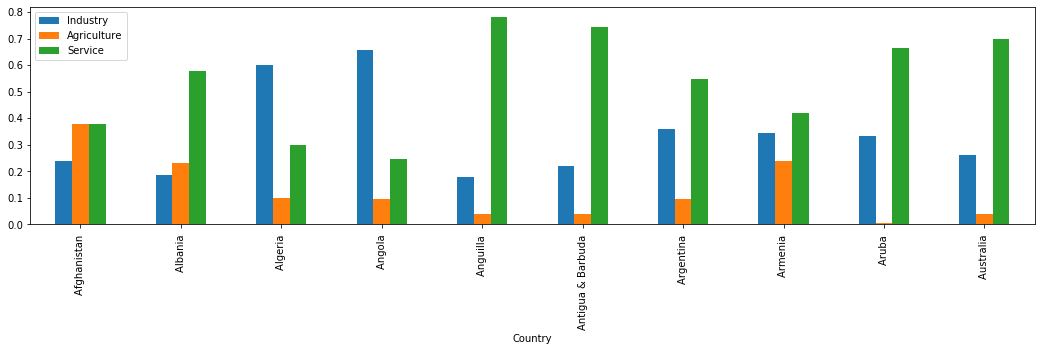

In [36]:
dataset.head(10).plot(kind='bar',x='Country',y=['Industry','Agriculture','Service'], figsize=(18,4))

In [ ]:
# The distribution of occupations for the first 10 records in the dataset
# As seen from the plot ratings for Service are higher is maximum records
# The ratings for Agriculture are very low all across

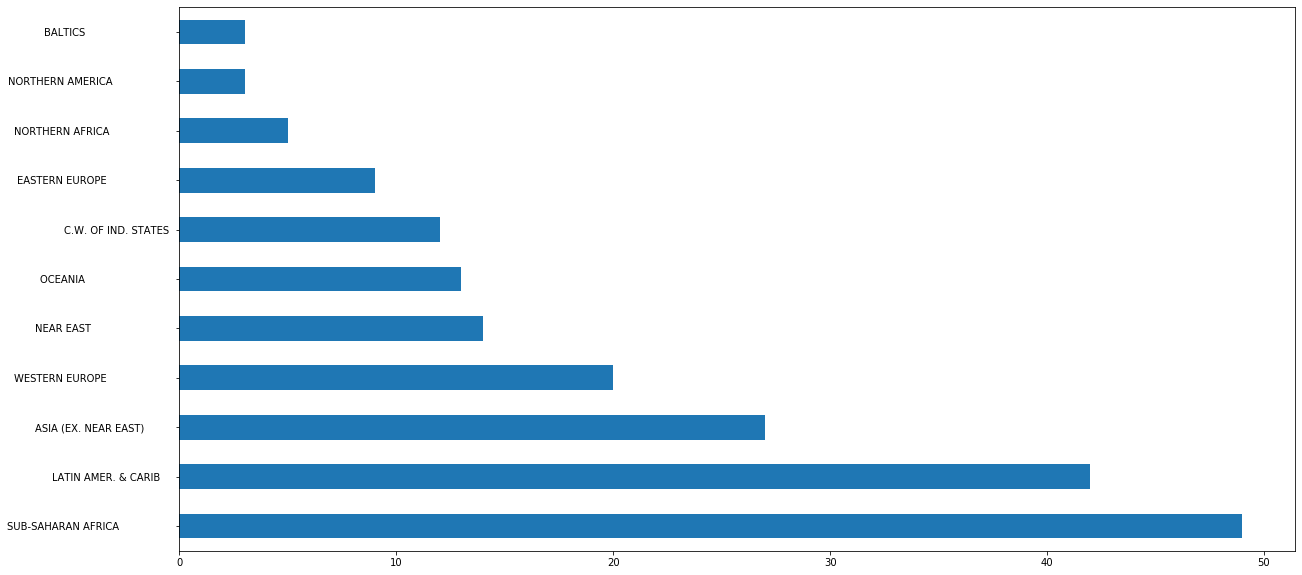

In [13]:
dataset['Region'].value_counts().plot(kind='barh',figsize=(20,10))

In [ ]:
# A horizontal barplot showing the distribution of the records region wise

## DataFrame 1 ---> Top 10 countries with highest GDP¶

In [14]:
df1 = dataset.nlargest(10, 'GDP')
df1

,Country,Region,Population,Area,Pop. Density,GDP,Literacy,Agriculture,Industry,Service
109,Luxembourg,WESTERN EUROPE,474413,2586,183.5,55100,100.0,0.010,0.130,0.860
136,Norway,WESTERN EUROPE,4610820,323802,14.2,37800,100.0,0.021,0.415,0.564
188,United States,NORTHERN AMERICA,298444215,9631420,31.0,37800,97.0,0.010,0.204,0.787
20,Bermuda,NORTHERN AMERICA,65773,53,1241.0,36000,98.0,0.010,0.100,0.890
35,Cayman Islands,LATIN AMER. & CARIB,45436,262,173.4,35000,98.0,0.014,0.032,0.954
172,Switzerland,WESTERN EUROPE,7523934,41290,182.2,32700,99.0,0.015,0.340,0.645
51,Denmark,WESTERN EUROPE,5450661,43094,126.5,31100,100.0,0.018,0.246,0.735
84,Iceland,WESTERN EUROPE,299388,103000,2.9,30900,99.9,0.086,0.150,0.765
10,Austria,WESTERN EUROPE,8192880,83870,97.7,30000,98.0,0.018,0.304,0.678
33,Canada,NORTHERN AMERICA,33098932,9984670,3.3,29800,97.0,0.022,0.294,0.684


In [ ]:
# The difference in GDP of Luxembourg and Canada is around 30,000, the size of Canada as a country is 3000 times
# higher than that of Luxembourg.
# Interestingly the population density of Luxembourg is 60 times higher than Canada, given the difference in areas of both the
# countries.

# For Bermuda the values of 'Agriculture', 'Industry', 'Service' are very close to that of Luxembourg but the difference is in
# Literacy rate and area, Luxembourg has a higher literacy rate and greater area as compared to Bermuda.


In [18]:
df1.describe(include='all')

,Country,Region,Population,Area,Pop. Density,GDP,Literacy,Agriculture,Industry,Service
count,10,10,1.000000e+01,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
unique,10,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,United States,WESTERN EUROPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,3.582065e+07,2.021405e+06,205.570000,35620.000000,98.690000,0.022400,0.221500,0.756200
std,NaN,NaN,9.280106e+07,4.105865e+06,371.357402,7499.599989,1.240475,0.022785,0.119541,0.120144
min,NaN,NaN,4.543600e+04,5.300000e+01,2.900000,29800.000000,97.000000,0.010000,0.032000,0.564000
25%,NaN,NaN,3.431442e+05,1.226200e+04,18.400000,30950.000000,98.000000,0.011000,0.135000,0.679500
50%,NaN,NaN,5.030740e+06,6.348200e+04,112.100000,33850.000000,98.500000,0.016500,0.225000,0.750000
75%,NaN,NaN,8.025644e+06,2.686015e+05,180.000000,37350.000000,99.975000,0.020250,0.301500,0.841750


In [ ]:
# For the 10 countries with highest GDP the std of literacy is 1.24 min of literacy is 98.69/100 and max is 100/100 
# High literacy rate is common to countries with high GDPs

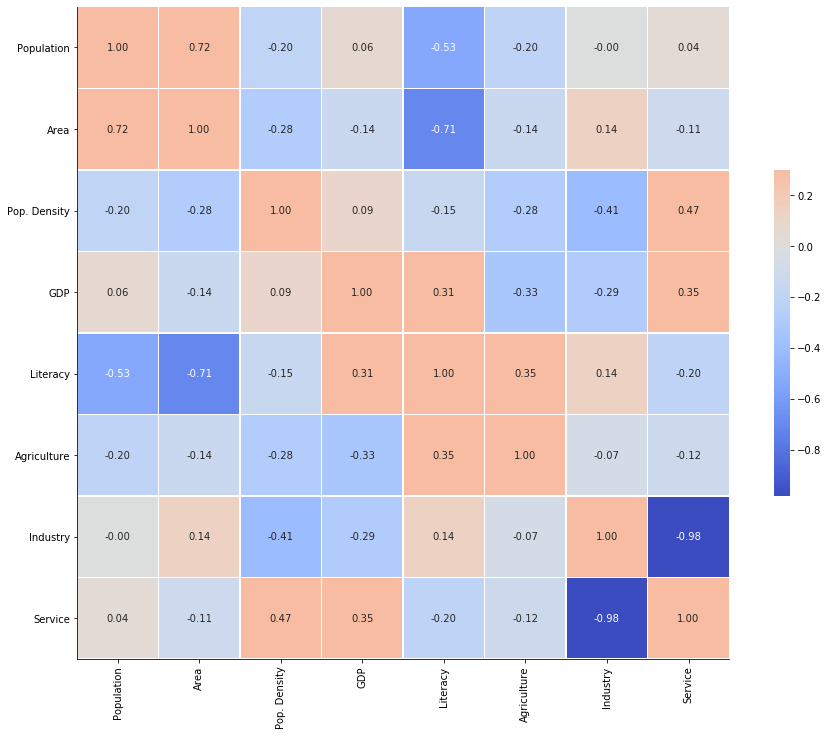

In [198]:
corr = df1.corr()
heatMap = sns.heatmap(corr,  vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
heatMap.figure.set_size_inches(16,12)
    
plt.show()

In [ ]:
# There is a positive correlation between ('Service' and 'Pop. Density') ('Literacy' and 'GDP') ('Literacy' and 'Agriculture')

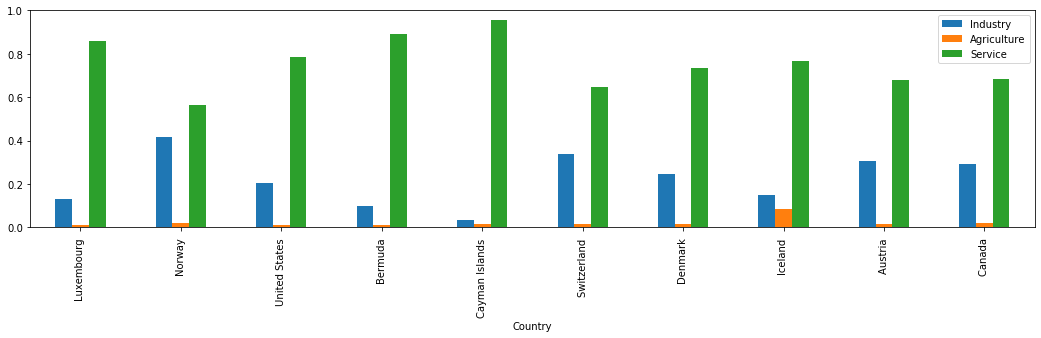

In [38]:
df1.plot(kind='bar',x='Country',y=['Industry','Agriculture','Service'], figsize=(18,4))

In [ ]:
# The distribution of occupations for the countries with highest GDP
# Service dominates in all 10 countries over the other 2 occupational categories

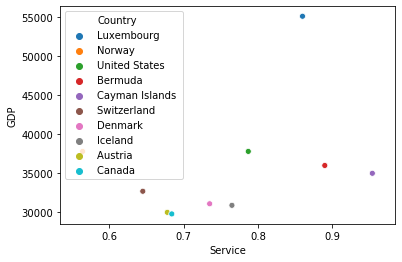

In [39]:
g =sns.scatterplot(y="GDP", x="Service",  data=df1, hue="Country");
g

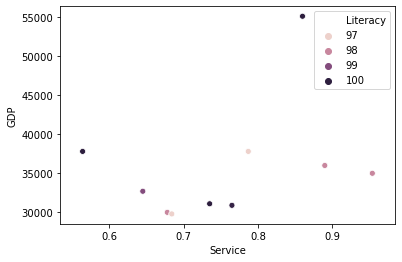

In [199]:
g =sns.scatterplot(y="GDP", x="Service",  data=df1, hue="Literacy");
g

In [ ]:
# A higher literacy rate corresponds to a higher GDP, but as seen in the scatterplot there are a few exceptions
# A few high literacy records have a lower GDP.
# In general the literacy rate is directly proportional to the GDP

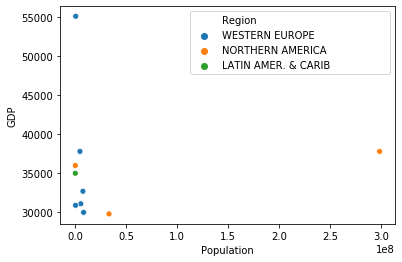

In [20]:
g =sns.scatterplot(y="GDP", x="Population", hue="Region", data=df1);
g

In [ ]:
# The Western Europe region has lower population and lower values for GDP with one exception having very high GDP.
# The Northen American region also has lower population and low GDP in general, except for one having very high population.
# The above mentioned regions dominate the others in terms of highest GDP dataframe, with maximum records from the 
# Western Europe region.

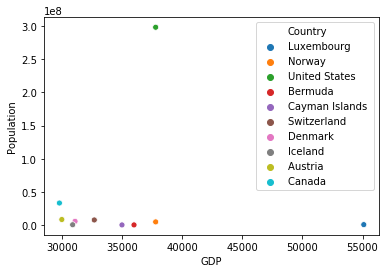

In [21]:
g =sns.scatterplot(x="GDP", y="Population", hue="Country", data=df1);
g

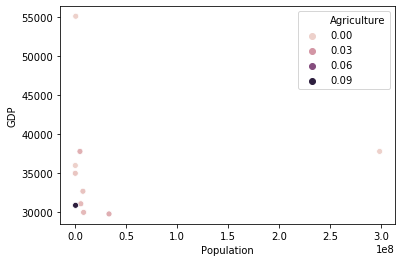

In [204]:
g =sns.scatterplot(y="GDP", x="Population", hue="Agriculture", data=df1);
g

In [ ]:
# The countries with the highes GDP have very low rating of Agriculture in general, with just one exception

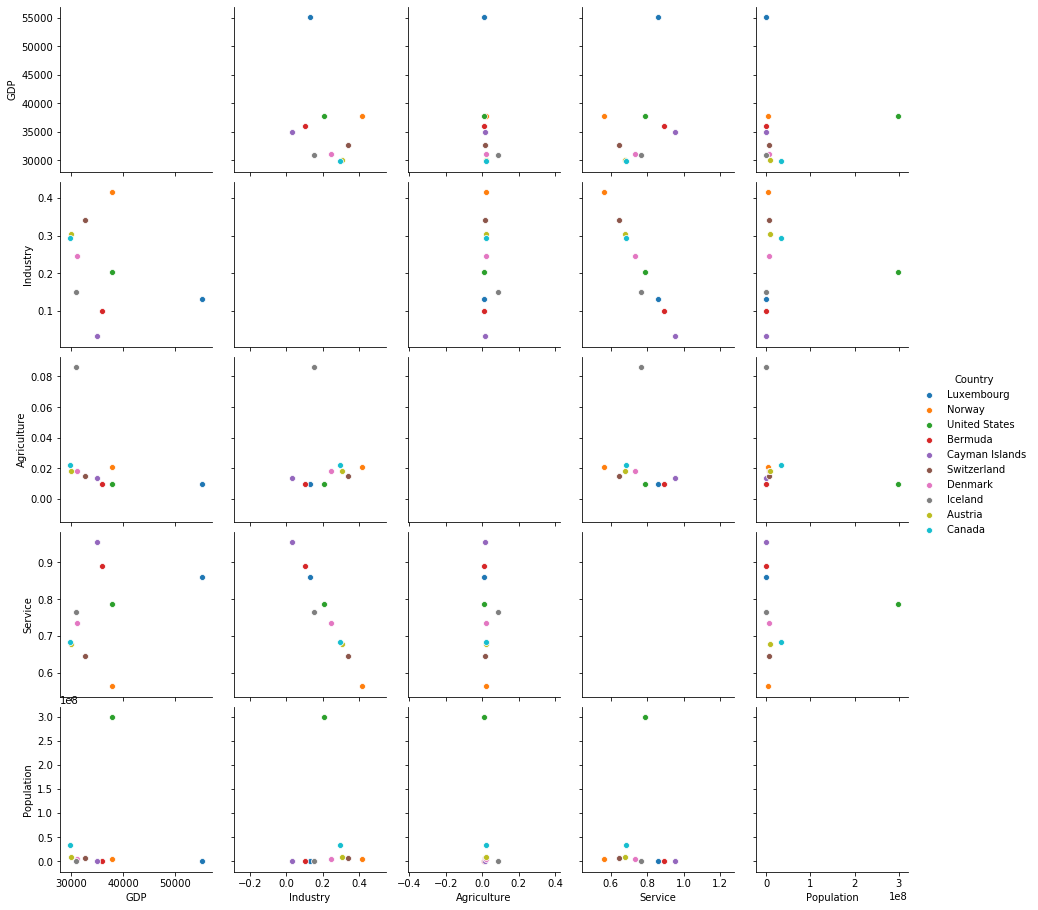

In [51]:
sns.pairplot(df1[['Country','GDP','Industry','Agriculture','Service','Population']], vars=['GDP','Industry','Agriculture','Service','Population'], hue='Country')

In [ ]:
# A concise view of the above plots

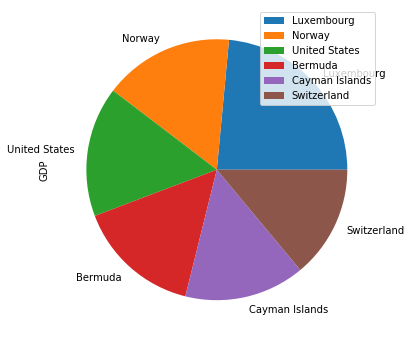

In [211]:
data1 = pd.DataFrame({'GDP': [55100,37800,37800,36000,35000,32700]},
                  index=['Luxembourg', 'Norway' , 'United States', 'Bermuda', 'Cayman Islands', 'Switzerland'])
plot = data1.plot.pie(figsize=(10, 6), subplots=True)

In [ ]:
# The pie plot shows the comparison of the GDPs between the 6 countries selected, apart from the highest value from Luxembourg,
# the pie shows the other countries are in a fierce competition, wit almost similar GDP outputs.

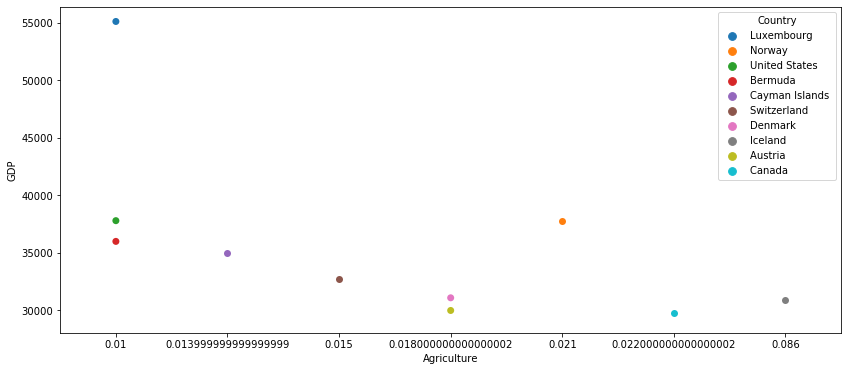

In [54]:
g = sns.swarmplot(x = "Agriculture", y ='GDP', data = df1, size = 7, hue="Country")
# sns.despine()
g.figure.set_size_inches(14,6)
# plt.xticks(rotation=90)
plt.show()

In [ ]:
# The range of rating of Agriculture for the highest GDP countries is very low in general.
# Luxembourg with the highest GDP value has the lowest rating for Agriculture.\
# This plot indicates these countries GDP's are driven by the other occupations and not Agriculture.
# Ironically the country with the highest rating for Agriculture, in the considered dataframe, has one of the lowest GDPs.

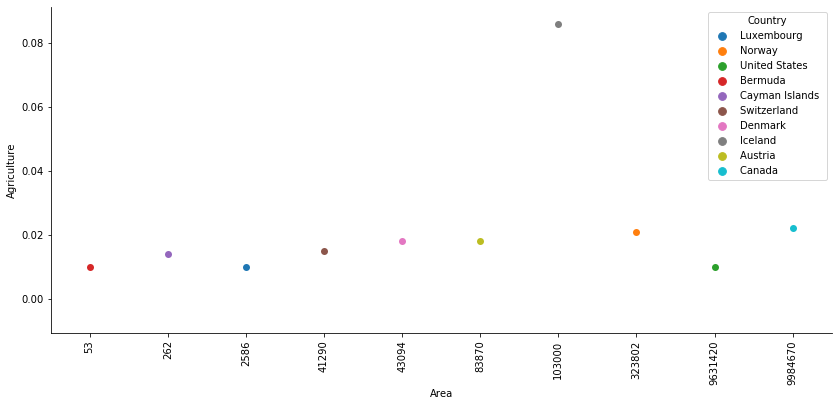

In [24]:
g = sns.swarmplot(y = "Agriculture", x ='Area', data = df1, size = 7, hue="Country")
sns.despine()
g.figure.set_size_inches(14,6)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Each of the highest grossing countries, irrespective of the area they cover have equal rating for Agriculture.
# Agriculture not being the primary source of income for these countries.
# The exception being Iceland which has the highest rating for Agriculture, with the area close the mean of the areas of the 
# said countries.

In [25]:
df3 = dataset.nlargest(15, 'Literacy')
df3

,Country,Region,Population,Area,Pop. Density,GDP,Literacy,Agriculture,Industry,Service
9,Australia,OCEANIA,20264082,7686850,2.6,29000,100.0,0.038,0.262,0.700
51,Denmark,WESTERN EUROPE,5450661,43094,126.5,31100,100.0,0.018,0.246,0.735
64,Finland,WESTERN EUROPE,5231372,338145,15.5,27400,100.0,0.028,0.295,0.676
107,Liechtenstein,WESTERN EUROPE,33987,160,212.4,25000,100.0,0.060,0.390,0.550
109,Luxembourg,WESTERN EUROPE,474413,2586,183.5,55100,100.0,0.010,0.130,0.860
136,Norway,WESTERN EUROPE,4610820,323802,14.2,37800,100.0,0.021,0.415,0.564
50,Czech Republic,EASTERN EUROPE,10235455,78866,129.8,15700,99.9,0.034,0.393,0.573
84,Iceland,WESTERN EUROPE,299388,103000,2.9,30900,99.9,0.086,0.150,0.765
61,Estonia,BALTICS,1324333,45226,29.3,12300,99.8,0.040,0.294,0.666
102,Latvia,BALTICS,2274735,64589,35.2,10200,99.8,0.040,0.261,0.699


In [ ]:
# The countries with high literacy rates, have a low rating for Agriculture.
# The higher rating for literacy and 'Industry' & 'Service' indicating that these 2 occupations require formal education
# The higher literacy rates also correspond to higher GDPs and lower population densities.

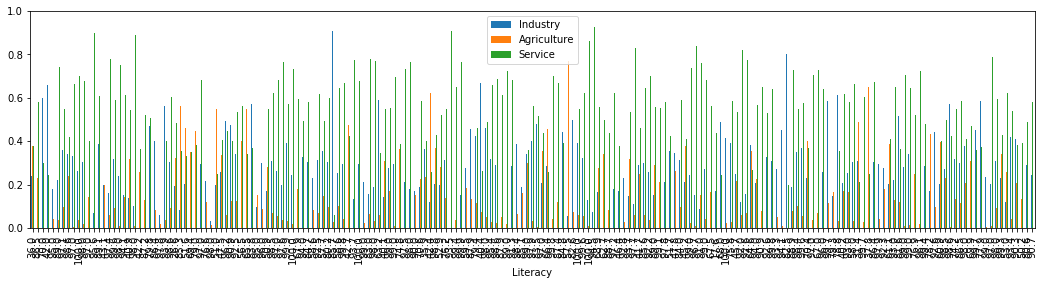

In [57]:
dataset.plot(kind='bar',x='Literacy',y=['Industry','Agriculture','Service'], figsize=(18,4))

In [ ]:
# Over the entire dataset the ratings for 'Service' dominate over 'Industry' and 'Agriculture'.

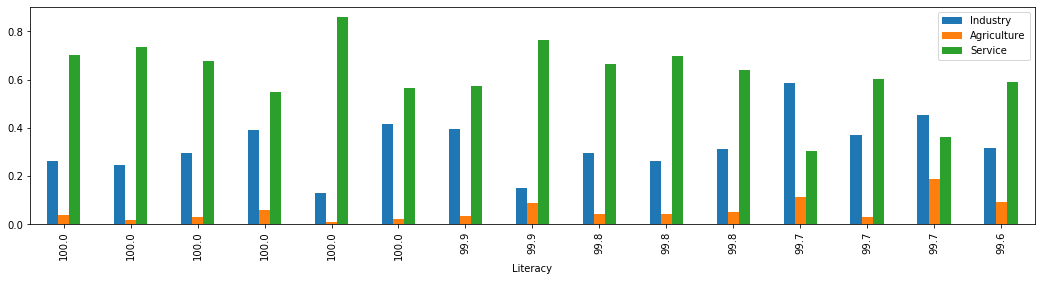

In [58]:
df3.plot(kind='bar',x='Literacy',y=['Industry','Agriculture','Service'], figsize=(18,4))

In [ ]:
# In the countries with highest literacy, 'Service' is predominant.
# Such countries do not rely on 'Agriculture' as the primary occupation.

In [26]:
df2 = dataset.nlargest(10, ['Pop. Density', 'Area'])
df2

,Country,Region,Population,Area,Pop. Density,GDP,Literacy,Agriculture,Industry,Service
110,Macau,ASIA (EX. NEAR EAST),453125,28,16183.0,19400,94.5,0.001,0.072,0.927
82,Hong Kong,ASIA (EX. NEAR EAST),6940432,1092,6355.7,28800,93.5,0.001,0.092,0.906
116,Malta,WESTERN EUROPE,400214,316,1266.5,17700,92.8,0.030,0.230,0.740
20,Bermuda,NORTHERN AMERICA,65773,53,1241.0,36000,98.0,0.010,0.100,0.890
114,Maldives,ASIA (EX. NEAR EAST),359008,300,1196.7,3900,97.2,0.200,0.180,0.620
13,Bahrain,NEAR EAST,698585,665,1050.5,16900,89.1,0.005,0.387,0.608
14,Bangladesh,ASIA (EX. NEAR EAST),147365352,144000,1023.4,1900,43.1,0.199,0.198,0.603
15,Barbados,LATIN AMER. & CARIB,279912,431,649.5,15700,97.4,0.060,0.160,0.780
174,Taiwan,ASIA (EX. NEAR EAST),23036087,35980,640.3,23400,96.1,0.018,0.259,0.723
120,Mauritius,SUB-SAHARAN AFRICA,1240827,2040,608.3,11400,85.6,0.059,0.298,0.643


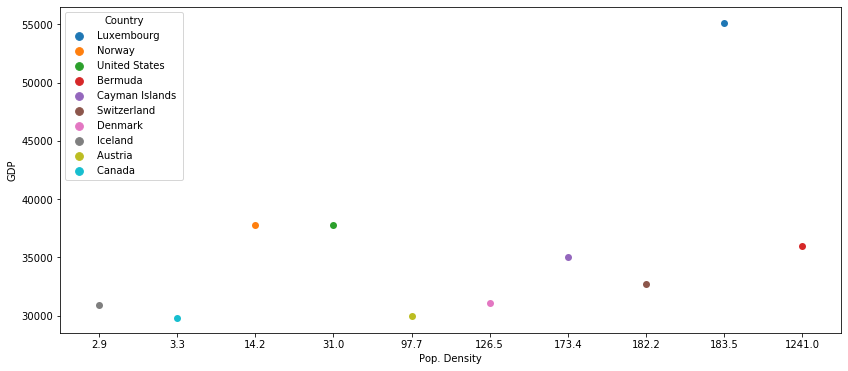

In [73]:
g = sns.swarmplot(x = "Pop. Density", y ='GDP', data = df1, size = 7, hue="Country")
g.figure.set_size_inches(14,6)
plt.show()

In [27]:
dfAgri = dataset.nlargest(10, ['Population', 'Agriculture'])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

<Figure size 2160x720 with 0 Axes>

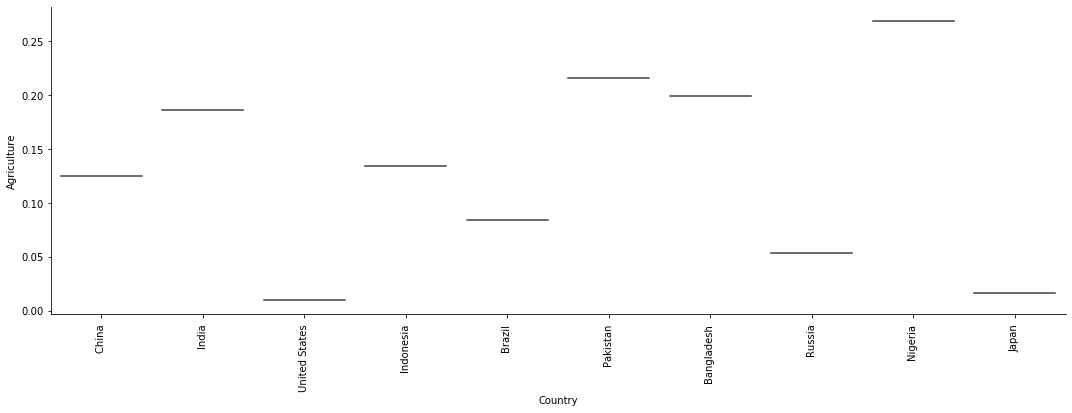

In [28]:
plt.figure(figsize=(30,10))
sns.catplot(
    data=dfAgri,
    x='Country',
    y='Agriculture', kind="boxen",
height=5,aspect=3)
plt.xticks(rotation=90)

<Figure size 1080x7200 with 0 Axes>

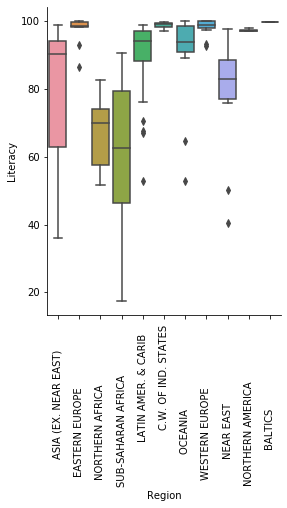

In [214]:
sns.catplot(x='Region', y='Literacy', 
            data=dataset, kind='box')
plt.xticks(rotation=90)

In [ ]:
# Countries in the Eastern Europe, C.W. of Ind.States, Western Europe, Northern American, Baltics have a high literacy rate.
# With very low variance in general and only a few outliers below the lower whisker, still pretty high.

# Countries in Asia and Sub-Saharan Africa region span a higher range of literacy rates.
# With the median of literacy rate for countries of Asian region still on the higher side.
# While the median of literacy rate for countries of Sub-Saharan Africa, close to the median of the literacy rate of the entire
# dataset.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

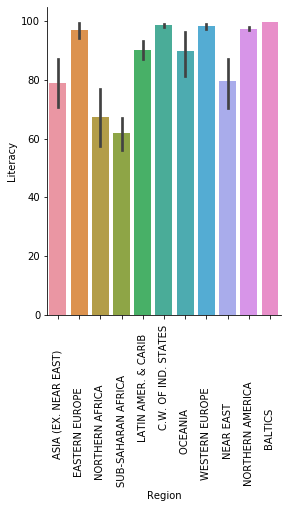

In [31]:
sns.catplot(x='Region', y='Literacy', 
            data=dataset, kind='bar')

plt.xticks(rotation=90)

In [162]:
country_geo = 'world_countries.json'

# Setup a folium map at a high-level zoom
m = folium.Map(zoom_start=1.0)

# choropleth maps bind Pandas Data Frames and json geometries.
#This allows us to quickly visualize data combinations
m.choropleth(geo_data=country_geo, 
             data=df2,
             name='GDP',
             columns=['Country','GDP'],
             key_on='feature.properties.name',
             fill_color='YlOrRd', 
             fill_opacity=0.5, 
             line_opacity=0.2,
             legend_name='GDP')
m.choropleth(geo_data=country_geo, 
             data=dataset,
             name='Literacy',
             columns=['Country','Literacy'],
             key_on='feature.properties.name',
             fill_color='YlOrRd',
             fill_opacity=0.5, 
             line_opacity=0.2,
             legend_name='Literacy')
m.choropleth(geo_data=country_geo, 
             data=dataset,
             name='Service',
             columns=['Country','Service'],
             key_on='feature.properties.name',
             fill_color='YlOrRd', 
             fill_opacity=0.5, 
             line_opacity=0.2,
             legend_name='Service')

folium.LayerControl().add_to(m)
m

In [5]:
import statsmodels.api as sm

X = dataset[['Pop. Density','Agriculture','Industry','Service']]
y = dataset['GDP']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     34.22
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.40e-21
Time:                        09:16:32   Log-Likelihood:                -2052.3
No. Observations:                 198   AIC:                             4115.
Df Residuals:                     193   BIC:                             4131.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -5.593e+04    8.2e+04     -0.682      0.496   -2.18e+05    1.06e+05
Pop. Density     0.2294      0.462      0.496      0.620      -0.683       1.141
Agriculture   3.098e+04    8.2e+04      0.378      0.706   -1.31e+05    1.93e+05
Industry      6.038e+04   8.19e+04      0.737      0.462   -1.01e+05    2.22e+05
Service       7.712e+04   8.22e+04      0.938      0.349    -8.5e+04    2.39e+05
==============================================================================
Omnibus:                       50.914   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.952
Skew:                           1.279   Prob(JB):                     3.97e-21
Kurtosis:                       5.202   Cond. No.                     3.74e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""